# 1. Introduction

In this notebook we are going to deal with a supervised learning (learning with teacher/labels) problem called Decision Tree(DT). Supervised learning is further divided into :
    1. Classification
    2. Regression
The agenda of this notebook is related to Decision Tree under the class of classification (though it is also used under regression also). So only classification and Decision Tree is targeted in this notebook

## 1.1. Classification

The similarity between classification and regression (which make them children of same parent class i.e. supervised learning) that both take a set of training instances and learn a mapping to a target value.But classification is different from regression because under the classification the target value is a discrete class value. 

### 1.1.1 Decision Tree
Decision Trees learns a series of explicit If Then rules on features values that results in the descition that predicts theatarget value. For example, when you try to guess what the other perosn is thinking by asking not and yes questions. This a popular supervise learning method that can be used for classification and regression. They are easy to use and understand and are often a good exploratory method if you are interested in getting a better idea about what the influencial features are in your data set


# 2. Steps Involved:
    0. Importing the required libraries - For importing all the dependencies.
    1. Making the Fucntions of the required steps.
    2. Importing dataset - For importing Dataset in the programm.
    3. Feature Engineering - For getting features from the dataset.
    4. Exploratory Data Analysis (EDA) - for checking the nature and structure of the dataset 
    5. Model Building - For Building the model (using sklearn).
    6. Model Fitting - Fitting the model for clustering.
    7. Saving the model - For re-use.
    8. Loading the model - for loading the trained model
    9. Evaluation of the model - For cheking the utility of the model.   


# 3. Prerequisties

## 3.1 Dataset

breast_cancer dataset (Standard dataset under scikit library) has been used as dataset which is consist of 31 columns:
    1. mean radius                
    2. mean texture               
    3. mean perimeter             
    4. mean area                 
    5. mean smoothness            
    6. mean compactness           
    7. mean concavity             
    8. mean concave points        
    9. mean symmetry            
    10. mean fractal dimension    
    11. radius error          
    12. texture error              
    13. perimeter error            
    14. area error               
    15. smoothness error          
    16. compactness error         
    17. concavity error        
    18. concave points erro
    19. symmetry error            
    20. fractal dimension error 
    21. worst radius           
    22. worst texture         
    23. worst perimeter          
    24. worst area                
    25. worst smoothness           
    26. worst compactness          
    27. worst concavity           
    28. worst concave points      
    29. worst symmetry            
    30. worst fractal dimension    
    31. target                     


## 3.2 Libraries Requirements
    scikit-learn == 0.19.1
    scipy == 1.1.0
    pandas == 0.23.1
    matplotlib == 2.0.2
    numpy == 1.16.3
    pickle == 0.7.4
    visulization_utilities

**NOTE** - visulization_utilities is not a python library. It is python script which is used in the model for better visulization of decision tree structure.
    
# 4. Use Case
Some famous use cases of Decision Tree are :

    1. Building knowledge management platforms for customer service that improve first call resolution, average handling time, and customer satisfaction rates
    2. In finance, forecasting future outcomes and assigning probabilities to those outcomes
    3. Binomial option pricing predictions and real option analysis
    4. Customer’s willingness to purchase a given product in a given setting, i.e. offline and online both
    5. Product planning; for example, Gerber Products, Inc. used decision trees to decide whether to continue planning PVC for manufacturing toys or not
    6. General business decision-making
    7. Loan approval



## Step 0. Importing the required libraries

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from matplotlib.colors import ListedColormap
import pickle
from sklearn.datasets import load_breast_cancer
from visulization_utilities import plot_decision_tree
from visulization_utilities import plot_feature_importances

## Step 1. Making the Fucntions of the required steps

In [122]:
# FUNCTION FOR IMPORTING THE DATASET
# Input:path of the dataset (CSV)
# Output:dataframe 
                                   
def import_dataset():
    cancer_dataset = load_breast_cancer()
    return cancer_dataset 

In [123]:
# FUNCTION FOR CONVERTING DATASET INTO DATAFRAME
# Input:Dataset imported
# Output:Dataframe 
def convert_dataset_to_dataframe(cancer_dataset):    
    df_cancer = pd.DataFrame(df.data,columns=df.feature_names)
    df_cancer['target'] = pd.Series(df.target)
    return df_cancer

In [124]:
# FUNCTION FOR SPLITING THE DATASET INTO FEATURES AND TARGET DATASET
# Input:dataframe
# Output:features dataset, target dataset

def split_dataset(cancer_dataset):
    X_cancer, y_cancer = load_breast_cancer(return_X_y = True)
    return X,y

In [125]:
# FUNCTION FOR SPILTING THE DATA INTO TRAIN AND TEST DATASET
# Input:features dataset, target dataset
# Output:train dataset,test dataset
def split_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    return X_train, X_test, y_train, y_test 

In [126]:
#FUNCTION FOR BUILDING THE MODEL
#Input:none
#Output:classifier
def model_build():
    classifier = clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,random_state = 0)
    return classifier

In [127]:
#FUNCTION FOR TRAINING THE MODEL
#Input:classifier, features and target dataset (training)
#Output:trained model
def model_train(classfier,X_train,y_train):
    model = classifier.fit(X_train,y_train)
    return model
    

In [128]:
#FUNCTION FOR SAVING MODEL
#Input:trained model
#Output:none
def model_save(model):
    pickle.dump(model, open('models/DT.pickle', 'wb'))

In [129]:
#FUNCTION FOR LOADING MODEL
#Input:Path of saved model
#Output:Loaded model
def model_load(path_model):
    model_loaded=pickle.load(open(path_model, 'rb'))
    return model_loaded

In [130]:
#FUNCTION FOR PREDICTIONS
#Input:model,dataset for predictions
#Output:predictions
def prediction(model_loaded,X_test):
    y_pred=classifier.predict(X_test)
    return y_pred

In [131]:
#FUNCTION FOR VALIDATIONS
#Input:predictions and real dataset
#Output:consfusion matrix, accuracy and classification report
def validation(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return cm,accuracy,report

## Step 2. Importing dataset

In [132]:
#Importing the dataset
cancer_dataset = import_dataset()

## Step 3. Exploratory Data Analysis (EDA)

In [133]:
#Converting dataset to dataframe for better Exploratory Data Analysis 
df_cancer = convert_dataset_to_dataframe(cancer_dataset)

In [134]:
# Checking the nature of the entiries of Dataset
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [135]:
# Checking the shape of the Dataset
df_cancer.shape

(569, 31)

In [136]:
# Checking the structure of the Dataset and Data type of all the variables of Dataset
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

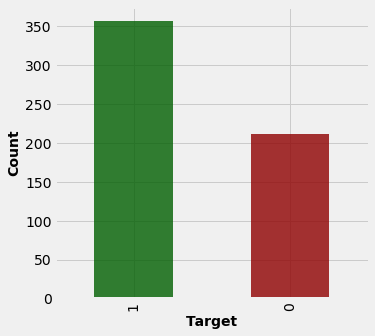

In [137]:
# Cheking the number of the entries under the classes of the Dataset
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
# Customizing plot size
plt.rcParams['figure.figsize'] = [5, 5]

font_style = {'size':14, 'weight':'bold', 'color':'#000000'}

df_cancer['target'].value_counts().plot(kind='bar', color=['#005f00', '#8f0000'], 
                                      alpha=0.8)


plt.xlabel('Target', fontdict=font_style)
plt.ylabel('Count', fontdict=font_style)
plt.show()

## Step 4.  Feature Engineering 

In [138]:
# Spliting the Dataset (Feature Extraction - Extracting the Features variables as X and target vairables as y)
X,y = split_dataset(cancer_dataset)
print (X,y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

## Step 5. Pre-processing

In [139]:
# Dividing the feature variables and target variables into testing and training.
X_train, X_test, y_train, y_test  = split_train_test(X,y)

## Step 6. Model Building

In [141]:
# Building the model
classifier = model_build()
print (classifier)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


## Step 7. Model Training 

In [142]:
## Training the model
model=model_train(classifier,X_train,y_train)
model_save(model)

In [143]:
## Saving the model
path_model = 'models/DT.pickle'
model_loaded = model_load(path_model)

## Step 8. Model Evaluation 

In [144]:
# Doing the predictions
y_pred = prediction(model_loaded,X_test)

In [145]:
# Calculating confusion matrix, accuracy and classification report
cm,accuracy,report = validation(y_test,y_pred)

In [146]:
# Printing the confusion matrix, accuracy and classification report
print ("confusion matrix\n",cm)
print ("Accuracy:",accuracy*100,"%")
print ("Report:",report)

confusion matrix
 [[52  1]
 [ 8 82]]
Accuracy: 93.7062937062937 %
Report:              precision    recall  f1-score   support

          0       0.87      0.98      0.92        53
          1       0.99      0.91      0.95        90

avg / total       0.94      0.94      0.94       143



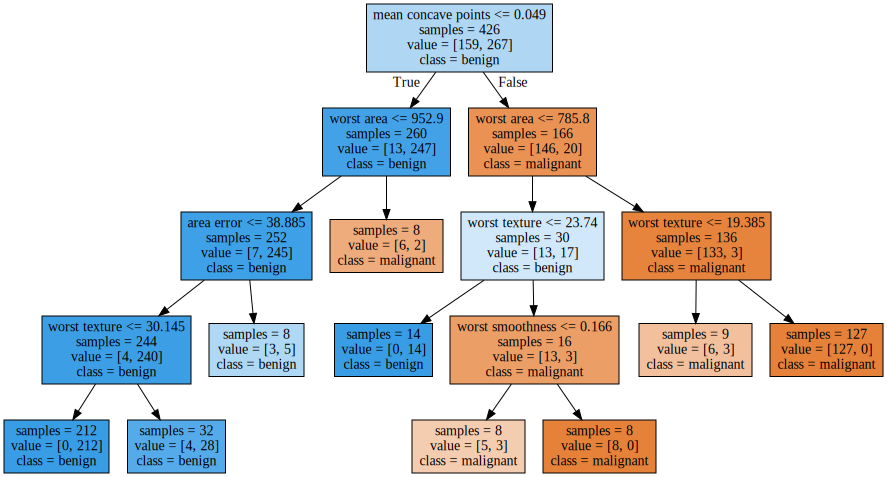

In [147]:
#plotting the decision tree using trained model
plot_decision_tree(model_loaded, cancer_dataset.feature_names, cancer_dataset.target_names)

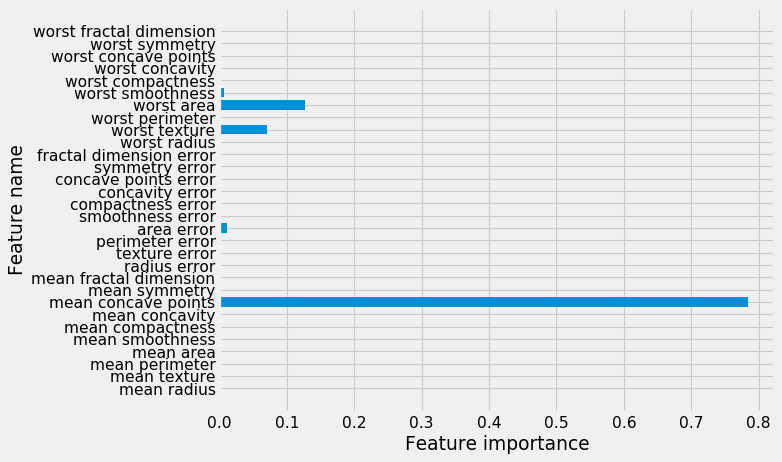

In [148]:
# a small use case of decision tree it can used for knowing importance of the different features, below is the example
plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(model_loaded, cancer_dataset.feature_names)
plt.tight_layout()

plt.show()